In [168]:
from labeler import *

data = getLabels("JawClench_labels_Ansh_12-02-21-1918.txt")
startTime = data[0]
labels = data[1]
data = getData("OpenBCI-RAW-2021-12-02_19-19-53.txt",labels,startTime)

data2 = getLabels("JawClench_labels_Ansh_12-02-21-1930.txt")
startTime = data2[0]
labels = data2[1]
data2 = getData("OpenBCI-RAW-2021-12-02_19-31-12.txt", labels, startTime)

data3 = getLabels("Recordings\Spring_2022\Evan_JawClench_1.txt")
startTime = data3[0]
labels = data3[1]
data3 = getData("Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_JawClench_2\OpenBCI-RAW-2022-02-16_19-30-28.txt", labels, startTime)

data = np.append(data, data2, axis=0).tolist()
data = np.append(data, data3, axis=0).tolist()


for i in range (len(data)):
    for j in range(len(data[i])):
        if j < len(data[i])-1:
            data[i][j] = (float)(data[i][j])
        else:
            data[i][j] = (int)(data[i][j])
data = np.array(data)

2021-12-02 19:19:55.073396
2021-12-02 19:31:14.177762
2022-02-16 19:30:30.103622


In [169]:
from sklearn import svm
bsize = 200
data = np.array(data)
X = np.zeros((len(data)//bsize, 4))
y = np.zeros(len(data)//bsize)
averages = np.array([np.mean(data[:, x]) for x in range(4)])
print(averages)
for i in range(len(data)//bsize):
    curX = data[bsize*i: bsize*(i+1), :-1]
    curY = data[bsize*i: bsize*(i+1), -1:]
    y[i] = (np.mean(curY)) > 0.3
    # print(y[i])
    # averages = (np.mean(curX, axis=0, keepdims=True))
    # mean_deviation = np.mean(curX - np.matmul(np.ones((bsize, 1)), (averages)), axis=0)
    # X[i, :] = (np.mean(np.abs(curX-averages), axis=0))
    # print(np.mean(curX - np.mean(curX, axis=0), axis=0))
    X[i, :] = np.mean(np.abs(curX - np.mean(data, axis=0)[0:4]), axis=0)

print(X)

[1702.39684046  607.73765035  844.60294179 1888.28190518]
[[ 137.43497472  134.14995452   55.33321576   17.7330739 ]
 [  69.42588681  148.0384134    52.87419      77.95438691]
 [  62.95303532  153.68372694   54.80396903   78.66510815]
 [  95.68509729  141.11798098   43.67945214   34.54494871]
 [  55.93126781  152.88532832   74.57003801   47.08546184]
 [  90.28920718  178.57264894   82.65083401  127.58395324]
 [ 115.21673431  176.62848065   82.73021339  104.51688355]
 [  37.44533958  184.34137918   76.65903914   80.00988013]
 [  34.5290964   179.34601138   86.96793474   79.51067574]
 [  51.41755031  160.15269734   55.46406216   84.24503937]
 [ 137.98002774  157.0268796    48.3658171    56.86575455]
 [ 135.06585095  149.85352709   64.73844371   66.5512263 ]
 [ 111.47591803  171.19737924   56.51509468   63.05043474]
 [ 122.3853556   137.20713954   43.13715205   33.34788887]
 [ 120.45908264  153.30910116   48.86721609   32.68072763]
 [  82.41868165  145.8680862    48.62922579   31.68023953

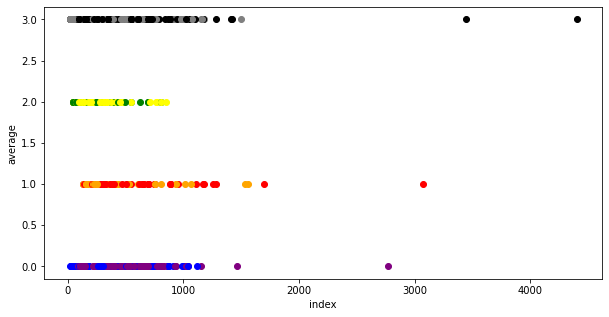

In [170]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.xlabel('index')
plt.ylabel('average')

colorgood = ('blue', 'orange', 'green', 'grey')
colorbad = ('purple', 'red', 'yellow', 'black')
pos = -1
for cg in range(len(X[0])):
    channel_groups = X[:, cg]
    pos = pos+1
    for i in range(len(X)):
        if(y[i] == 0):
            color = colorbad
        else:
            color = colorgood
        plt.plot(channel_groups[i], pos, 'o', color = color[pos])
        # if(pos == 0):
        #     plt.plot(channel_groups[i], 0, 'o', color = color[pos])
        # if(pos == 1):
        #     plt.plot(channel_groups[i], 1, 'o', color = color[pos])
        # if(pos == 2):
        #     plt.plot(channel_groups[i], 2, 'o', color = color[pos])
        # if(pos == 3):
        #     plt.plot(channel_groups[i], 3, 'o', color = color[pos])


In [171]:
print(X.shape)
print(y.shape)

(205, 4)
(205,)


In [174]:
from sklearn.model_selection import train_test_split

X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.33, random_state = 4)
X = X_res
y = y_res
model = svm.SVC(probability=True)
model.fit(X, y)

SVC(probability=True)

In [175]:
correct = 0
total = 0

# X = np.concatenate((X_test, X))
# y = np.concatenate((y_test, y))

res = (np.array(model.predict_proba(X_test)[:,1] > 0.5, dtype=np.int32))
print(res.tolist())
print(y_test)
val_error = np.mean(np.abs(res - y_test))
print("validation error", val_error)

X = np.concatenate((X_test, X_res))
y = np.concatenate((y_test, y_res))
print()

res = (np.array(model.predict_proba(X)[:,1] > 0.5, dtype=np.int32))
overall_error = np.mean(np.abs(res - y))
print(res)
print(y)
print("Overall Error", overall_error)
        

[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
[1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
validation error 0.4117647058823529

[1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0]
[1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.